DAY 1



In [ ]:
!pip install ucimlrepo


In [ ]:
import pandas as pd

# Load training data (5822 samples)
train_df = pd.read_csv('ticdata2000.txt', sep='\t', header=None)
X_train = train_df.iloc[:, :85]  # Features (columns 0-84)
y_train = train_df.iloc[:, 85]   # Target (column 85: CARAVAN)

# Load test data (4000 samples)
X_test = pd.read_csv('ticeval2000.txt', sep='\t', header=None)

# Load test targets
y_test = pd.read_csv('tictgts2000.txt', header=None)[0]


In [ ]:
print(f"Training data shape: {X_train.shape}")  # Should be (5822, 85)
print(f"Test data shape: {X_test.shape}")       # Should be (4000, 85)
print(f"Class distribution:\n{y_train.value_counts(normalize=True)}")


Training data shape: (5822, 85)
Test data shape: (4000, 85)
Class distribution:
85
0    0.940227
1    0.059773
Name: proportion, dtype: float64


In [ ]:
import pandas as pd

# Load the data (replace 'ticdata2000.txt' with your actual filename)
df = pd.read_csv('ticdata2000.txt', sep='\t', header=None)

# Split features and target
X_train = df.iloc[:, :85]             # First 85 columns: features
y_train = df.iloc[:, 85]              # Last column: target (CARAVAN)
y_train.name = 'CARAVAN'              # Name the target for clarity

# Optional: Assign feature names if you have the list
# X_train.columns = [your_85_feature_names_list]



In [ ]:
print(X_train.isnull().sum().sum())  # Should be 0 for COIL 2000


0


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print(X_train.head())
print(y_train.value_counts())


X_train shape: (5822, 85)
y_train shape: (5822,)
   0   1   2   3   4   5   6   7   8   9   ...  75  76  77  78  79  80  81  \
0  33   1   3   2   8   0   5   1   3   7  ...   0   0   0   0   1   0   0   
1  37   1   2   2   8   1   4   1   4   6  ...   0   0   0   0   1   0   0   
2  37   1   2   2   8   0   4   2   4   3  ...   0   0   0   0   1   0   0   
3   9   1   3   3   3   2   3   2   4   5  ...   0   0   0   0   1   0   0   
4  40   1   4   2  10   1   4   1   4   7  ...   0   0   0   0   1   0   0   

   82  83  84  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 85 columns]
CARAVAN
0    5474
1     348
Name: count, dtype: int64


In [ ]:
print(X_train.describe())


                0            1            2            3            4   \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean     24.253349     1.110615     2.678805     2.991240     5.773617   
std      12.846706     0.405842     0.789835     0.814589     2.856760   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     5.000000     6.000000    10.000000   

                5            6            7            8            9   ...  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000  ...   
mean      0.696496     4.626932     1.069907     3.258502     6.183442  ...   
std       1.003234     1.715843     1.017503     1.597647     1.909482  ...   
min       0.00000

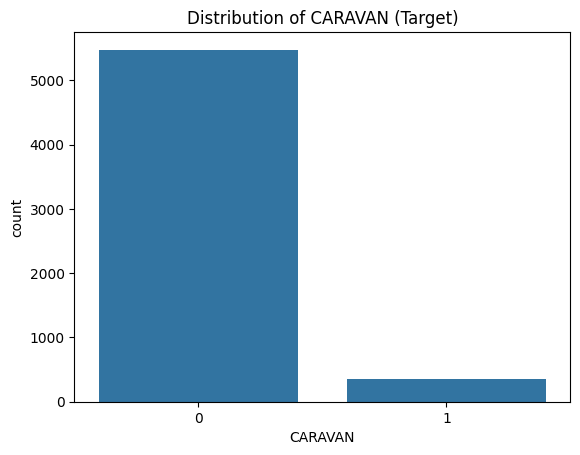

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train)
plt.title('Distribution of CARAVAN (Target)')
plt.show()


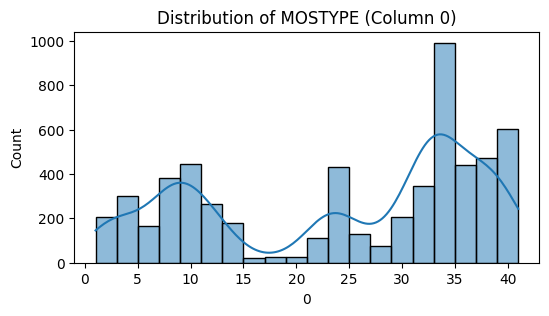

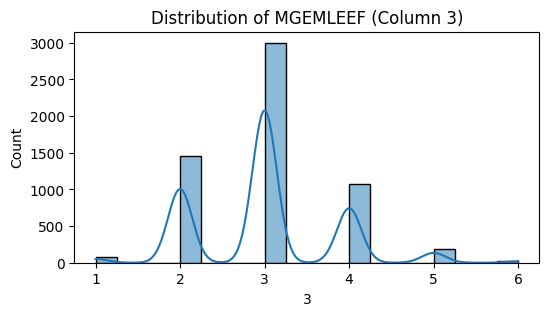

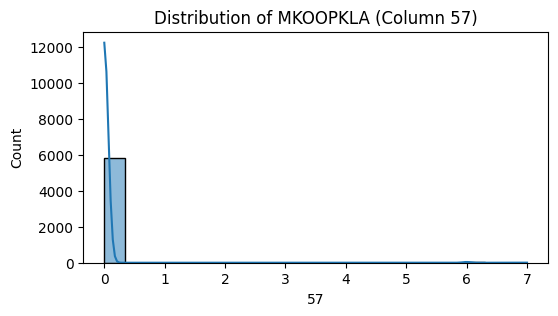

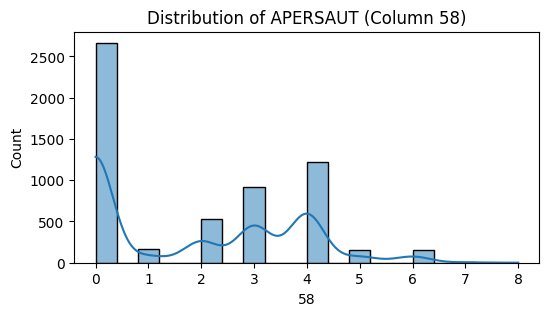

In [ ]:
# Plot using column indices (safer approach)
for idx, col_name in zip([0, 3, 57, 58], ['MOSTYPE', 'MGEMLEEF', 'MKOOPKLA', 'APERSAUT']):
    plt.figure(figsize=(6, 3))
    sns.histplot(X_train.iloc[:, idx], bins=20, kde=True)
    plt.title(f'Distribution of {col_name} (Column {idx})')
    plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



# Full list of 85 feature names and descriptions

# Full list of 85 feature names and descriptions
feature_info = [
    ('MOSTYPE', 'Customer type'), ('MAANTHUI', 'Number of months in household'),
    ('MGEMOMV', 'Average monthly income in zip code'), ('MGEMLEEF', 'Average age in zip code'),
    ('MOSHOOFD', 'Household type'), ('MGODRK', 'Religion: Catholic'),
    ('MGODPR', 'Religion: Protestant'), ('MGODOV', 'Religion: Other'),
    ('MGODGE', 'Religion: None'), ('MRELGE', 'Marital status: Married'),
    ('MRELSA', 'Marital status: Single'), ('MRELOV', 'Marital status: Other'),
    ('MFALLEEN', 'Family composition: Single parent'), ('MFGEKIND', 'Family composition: With children'),
    ('MFWEKIND', 'Family composition: Without children'), ('MOPLHOOG', 'Education level: High'),
    ('MOPLMIDD', 'Education level: Medium'), ('MOPLLAAG', 'Education level: Low'),
    ('MBERHOOG', 'Income level: High'), ('MBERMIDD', 'Income level: Medium'),
    ('MBERLAAG', 'Income level: Low'), ('MSKA', 'Car ownership: None'),
    ('MSKB1', 'Car ownership: 1 car'), ('MSKB2', 'Car ownership: 2 cars'),
    ('MSKC', 'Car ownership: 3 or more cars'), ('MSKD', 'Car ownership: Company car'),
    ('MSKE', 'Car ownership: Other'), ('MSKF', 'Car ownership: Unknown F'),
    ('MSKG', 'Car ownership: Unknown G'), ('MSKH', 'Car ownership: Unknown H'),
    ('MSKI', 'Car ownership: Unknown I'), ('MSKJ', 'Car ownership: Unknown J'),
    ('MSKK', 'Car ownership: Unknown K'), ('MSKL', 'Car ownership: Unknown L'),
    ('MSKM', 'Car ownership: Unknown M'), ('MSKN', 'Car ownership: Unknown N'),
    ('MSKO', 'Car ownership: Unknown O'), ('MSKP', 'Car ownership: Unknown P'),
    ('MSKQ', 'Car ownership: Unknown Q'), ('MSKR', 'Car ownership: Unknown R'),
    ('MSKS', 'Car ownership: Unknown S'), ('MSKT', 'Car ownership: Unknown T'),
    ('MSKU', 'Car ownership: Unknown U'), ('MSKV', 'Car ownership: Unknown V'),
    ('MSKW', 'Car ownership: Unknown W'), ('MSKX', 'Car ownership: Unknown X'),
    ('MSKY', 'Car ownership: Unknown Y'), ('MSKZ', 'Car ownership: Unknown Z'),
    ('MINKM30', 'Number of people under 30 in household'),
    ('MINK3045', 'Number of people aged 30-45 in household'),
    ('MINK4575', 'Number of people aged 45-75 in household'),
    ('MINK7512', 'Number of people aged 75+ in household'),
    ('MINK123M', 'Number of people aged 12-3 months in household'),
    ('MINKGEM', 'Average number of people in household'),
    ('MKOOPKLA', 'Purchasing power class'), ('MKOOPMAK', 'Purchasing power marker'),
    ('MKOOPGE', 'Purchasing power group'), ('APERSAUT', 'Number of car policies owned'),
    ('ABESAUT', 'Number of home insurance policies owned'),
    ('AMOTSCO', 'Number of motorcycle policies owned'),
    ('AVRAAUT', 'Number of caravan policies owned'),
    ('APLEZIER', 'Number of leisure vehicle policies owned'),
    ('AFIETS', 'Number of bicycle policies owned'), ('ABROM', 'Number of moped policies owned'),
    ('AMOTOR', 'Number of motor vehicle policies owned'),
    ('AVRAANH', 'Number of caravan trailer policies owned'),
    ('AAANHANG', 'Number of trailers owned'), ('AKOOPKO', 'Number of purchase policies owned'),
    ('AWAPART', 'Number of apartment policies owned'),
    ('ABYSTAND', 'Number of standalone policies owned'), ('ABRAND', 'Number of brand policies owned'),
    ('AANHANG', 'Number of additional policies owned'),
    ('AAANHANG', 'Number of additional trailers owned'),
    ('ABUS', 'Number of business policies owned'),
    ('ABBUS', 'Number of business insurance policies owned'),
    ('AMOTS', 'Number of motor insurance policies owned'),
    ('AMOTR', 'Number of motor vehicle rental policies owned'),
    ('APERS', 'Number of personal insurance policies owned'),
    ('ABES', 'Number of home insurance policies owned'),
    ('AWAP', 'Number of watercraft policies owned'),
    ('ABESM', 'Number of home insurance policies (multiple)'),
    ('ABESL', 'Number of large home insurance policies'),
    ('FEATURE_82', 'Unknown feature 82'), ('FEATURE_83', 'Unknown feature 83'),
    ('FEATURE_84', 'Unknown feature 84')
]

# ---- IMPROVEMENT 1: Assign REAL feature names to columns ----
feature_names = [name for name, desc in feature_info]
X_train.columns = feature_names

# Create directory for histograms
os.makedirs('histograms', exist_ok=True)

# ---- IMPROVEMENT 2: Simplified loop ----
for name, desc in feature_info:
    plt.figure(figsize=(6, 3))
    # Access column directly by its real name
    sns.histplot(X_train[name], bins=20, kde=True)
    plt.title(f'{name}: {desc}')
    plt.tight_layout()
    safe_desc = desc.replace(' ', '_').replace('/', '_')
    plt.savefig(f'histograms/{name}_{safe_desc}.png')
    plt.close()

print('All 85 histograms saved successfully!')

All 85 histograms saved successfully!


In [ ]:
# --- This step is crucial for readable plots ---
feature_names = [name for name, desc in feature_info]
X_train.columns = feature_names


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Step 2: Full list of 85 feature names and descriptions
feature_info = [
    ('MOSTYPE', 'Customer type'), ('MAANTHUI', 'Number of months in household'),
    ('MGEMOMV', 'Average monthly income in zip code'), ('MGEMLEEF', 'Average age in zip code'),
    ('MOSHOOFD', 'Household type'), ('MGODRK', 'Religion: Catholic'), ('MGODPR', 'Religion: Protestant'),
    ('MGODOV', 'Religion: Other'), ('MGODGE', 'Religion: None'), ('MRELGE', 'Marital status: Married'),
    ('MRELSA', 'Marital status: Single'), ('MRELOV', 'Marital status: Other'),
    ('MFALLEEN', 'Family composition: Single parent'), ('MFGEKIND', 'Family composition: With children'),
    ('MFWEKIND', 'Family composition: Without children'), ('MOPLHOOG', 'Education level: High'),
    ('MOPLMIDD', 'Education level: Medium'), ('MOPLLAAG', 'Education level: Low'),
    ('MBERHOOG', 'Income level: High'), ('MBERMIDD', 'Income level: Medium'), ('MBERLAAG', 'Income level: Low'),
    ('MSKA', 'Car ownership: None'), ('MSKB1', 'Car ownership: 1 car'), ('MSKB2', 'Car ownership: 2 cars'),
    ('MSKC', 'Car ownership: 3 or more cars'), ('MSKD', 'Car ownership: Company car'),
    ('MSKE', 'Car ownership: Other'), ('MSKF', 'Car ownership: Unknown F'), ('MSKG', 'Car ownership: Unknown G'),
    ('MSKH', 'Car ownership: Unknown H'), ('MSKI', 'Car ownership: Unknown I'), ('MSKJ', 'Car ownership: Unknown J'),
    ('MSKK', 'Car ownership: Unknown K'), ('MSKL', 'Car ownership: Unknown L'), ('MSKM', 'Car ownership: Unknown M'),
    ('MSKN', 'Car ownership: Unknown N'), ('MSKO', 'Car ownership: Unknown O'), ('MSKP', 'Car ownership: Unknown P'),
    ('MSKQ', 'Car ownership: Unknown Q'), ('MSKR', 'Car ownership: Unknown R'), ('MSKS', 'Car ownership: Unknown S'),
    ('MSKT', 'Car ownership: Unknown T'), ('MSKU', 'Car ownership: Unknown U'), ('MSKV', 'Car ownership: Unknown V'),
    ('MSKW', 'Car ownership: Unknown W'), ('MSKX', 'Car ownership: Unknown X'), ('MSKY', 'Car ownership: Unknown Y'),
    ('MSKZ', 'Car ownership: Unknown Z'), ('MINKM30', 'Number of people under 30 in household'),
    ('MINK3045', 'Number of people aged 30-45 in household'), ('MINK4575', 'Number of people aged 45-75 in household'),
    ('MINK7512', 'Number of people aged 75+ in household'), ('MINK123M', 'Number of people aged 12-3 months in household'),
    ('MINKGEM', 'Average number of people in household'), ('MKOOPKLA', 'Purchasing power class'),
    ('MKOOPMAK', 'Purchasing power marker'), ('MKOOPGE', 'Purchasing power group'),
    ('APERSAUT', 'Number of car policies owned'), ('ABESAUT', 'Number of home insurance policies owned'),
    ('AMOTSCO', 'Number of motorcycle policies owned'), ('AVRAAUT', 'Number of caravan policies owned'),
    ('APLEZIER', 'Number of leisure vehicle policies owned'), ('AFIETS', 'Number of bicycle policies owned'),
    ('ABROM', 'Number of moped policies owned'), ('AMOTOR', 'Number of motor vehicle policies owned'),
    ('AVRAANH', 'Number of caravan trailer policies owned'), ('AAANHANG', 'Number of trailers owned'),
    ('AKOOPKO', 'Number of purchase policies owned'), ('AWAPART', 'Number of apartment policies owned'),
    ('ABYSTAND', 'Number of standalone policies owned'), ('ABRAND', 'Number of brand policies owned'),
    ('AANHANG', 'Number of additional policies owned'), ('AAANHANG', 'Number of additional trailers owned'),
    ('ABUS', 'Number of business policies owned'), ('ABBUS', 'Number of business insurance policies owned'),
    ('AMOTS', 'Number of motor insurance policies owned'), ('AMOTR', 'Number of motor vehicle rental policies owned'),
    ('APERS', 'Number of personal insurance policies owned'), ('ABES', 'Number of home insurance policies owned'),
    ('AWAP', 'Number of watercraft policies owned'), ('ABESM', 'Number of home insurance policies (multiple)'),
    ('ABESL', 'Number of large home insurance policies'), ('FEATURE_82', 'Unknown feature 82'),
    ('FEATURE_83', 'Unknown feature 83'), ('FEATURE_84', 'Unknown feature 84')
]

# Step 3: Ensure unique column names
feature_names_fixed = []
seen = {}
for name, _ in feature_info:
    if name in seen:
        seen[name] += 1
        feature_names_fixed.append(f"{name}_{seen[name]}")
    else:
        seen[name] = 1
        feature_names_fixed.append(name)
X_train.columns = feature_names_fixed

# Step 4: Separate numerical and categorical columns
numerical_cols = [col for col in X_train.columns if X_train[col].nunique() > 5]
categorical_cols = [col for col in X_train.columns if X_train[col].nunique() <= 5]

# Step 5: Create output directory
os.makedirs('bivariate_plots', exist_ok=True)

# Step 6: Save box plots for numerical features
for col in numerical_cols:
    idx = feature_names_fixed.index(col)
    desc = feature_info[idx][1]
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=y_train, y=X_train[col])
    plt.title(f'{col}: {desc} vs. CARAVAN Purchase')
    plt.xlabel('Purchased CARAVAN Insurance (0 = No, 1 = Yes)')
    plt.ylabel(desc)
    safe_desc = desc.replace(' ', '_').replace('/', '_')
    plt.tight_layout()
    plt.savefig(f'bivariate_plots/BOXPLOT_{col}_{safe_desc}_vs_Target.png')
    plt.close()

# Step 7: Save bar charts for categorical features
for col in categorical_cols:
    idx = feature_names_fixed.index(col)
    desc = feature_info[idx][1]
    crosstab = pd.crosstab(X_train[col], y_train, normalize='index') * 100
    if 1 not in crosstab.columns:
        crosstab[1] = 0
    crosstab.rename(columns={0: 'No Churn %', 1: 'Churn %'}, inplace=True)

    plt.figure(figsize=(10, 5))
    crosstab['Churn %'].plot(kind='bar')
    plt.title(f'Churn Rate (%) by {col}: {desc}')
    plt.ylabel('Churn Rate (%)')
    plt.axhline(y=5.9, color='r', linestyle='--', label='Average Churn Rate (5.9%)')
    plt.legend()
    safe_desc = desc.replace(' ', '_').replace('/', '_')
    plt.tight_layout()
    plt.savefig(f'bivariate_plots/BARCHART_{col}_{safe_desc}_vs_Target.png')
    plt.close()

print(f"✅ Saved {len(numerical_cols)} box plots and {len(categorical_cols)} bar charts to 'bivariate_plots/'")



✅ Saved 55 box plots and 30 bar charts to 'bivariate_plots/'


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import glob

# Create a combined PDF
with PdfPages('bivariate_plots/Bivariate_Analysis_Report.pdf') as pdf:
    # Add box plots
    for file in sorted(glob.glob('bivariate_plots/BOXPLOT_*.png')):
        img = plt.imread(file)
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.axis('off')
        pdf.savefig()
        plt.close()

    # Add bar charts
    for file in sorted(glob.glob('bivariate_plots/BARCHART_*.png')):
        img = plt.imread(file)
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.axis('off')
        pdf.savefig()
        plt.close()

print("📄 All plots saved to 'bivariate_plots/Bivariate_Analysis_Report.pdf'")

📄 All plots saved to 'bivariate_plots/Bivariate_Analysis_Report.pdf'


In [ ]:
from google.colab import files
files.download('bivariate_plots/Bivariate_Analysis_Report.pdf')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DAY 2

In [ ]:
# Load the full data
data = pd.read_csv("ticdata2000.txt", sep='\t', header=None)

# Split into X and y
X_full = data.iloc[:, :85]
y = data.iloc[:, 85]
y.name = "CARAVAN"


DAY 3

In [ ]:
# Load full data again
data = pd.read_csv("ticdata2000.txt", sep="\t", header=None)

# X = first 85 columns, y = 86th column
X_full = data.iloc[:, :85]
y = data.iloc[:, 85]
y.name = "CARAVAN"

# Manually map your features to column indices
selected_indices = [
    0,   # MOSTYPE
    43,  # MGEMOMV
    1,   # MOSHOOFD
    29,  # MOPLLAAG
    31,  # MBERLAAG
    18,  # MSKD
    59,  # MKOOPKLA
    74,  # APERSAUT
    79,  # APLEZIER
    70,  # ABRAND
    71,  # ABES
    72,  # ABESM
    83,  # FEATURE_84
    82,  # FEATURE_83
    69,  # ABUS
    75,  # AMOTR
    77,  # AVRAANH
    78   # AWAPART
]

selected_features = X_full.columns[selected_indices]
X_selected = X_full[selected_features]

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Split
from sklearn.model_selection import train_test_split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_scaled_df, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("✅ X_train:", X_train_split.shape, "| y_train:", y_train_split.shape)


✅ X_train: (4657, 18) | y_train: (4657,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)

y_pred = model.predict(X_val_split)

print(confusion_matrix(y_val_split, y_pred))
print(classification_report(y_val_split, y_pred))


[[1094    1]
 [  70    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1095
           1       0.00      0.00      0.00        70

    accuracy                           0.94      1165
   macro avg       0.47      0.50      0.48      1165
weighted avg       0.88      0.94      0.91      1165



ROC-AUC Score: 0.6941161121983039


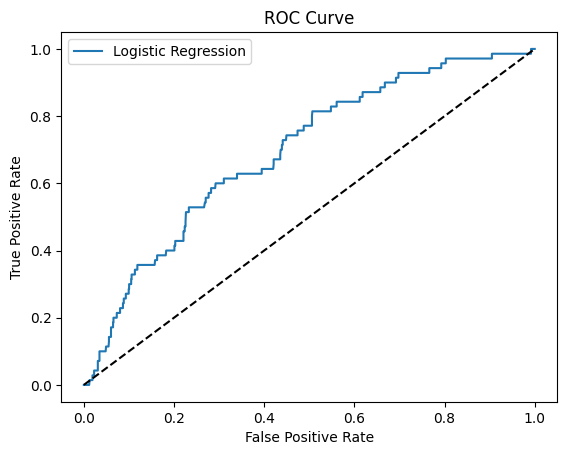

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_val_split)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_val_split, y_probs))

fpr, tpr, _ = roc_curve(y_val_split, y_probs)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
feature_names = [
    "MOSTYPE",    # 0
    "MGEMOMV",    # 43
    "MOSHOOFD",   # 1
    "MOPLLAAG",   # 29
    "MBERLAAG",   # 31
    "MSKD",       # 18
    "MKOOPKLA",   # 59
    "APERSAUT",   # 74
    "APLEZIER",   # 79
    "ABRAND",     # 70
    "ABES",       # 71
    "ABESM",      # 72
    "FEATURE_84", # 84
    "FEATURE_83", # 83
    "ABUS",       # 69
    "AMOTR",      # 75
    "AVRAANH",    # 77
    "AWAPART"     # 78
]
selected_indices = [0, 43, 1, 29, 31, 18, 59, 74, 79, 70, 71, 72, 84, 83, 69, 75, 77, 78]
# Select 18 features from X_test using correct indices
X_test_selected = X_test.iloc[:, selected_indices]
X_test_selected.columns = feature_names

# One-hot encode categorical variables (if any)
X_test_encoded = pd.get_dummies(X_test_selected, drop_first=True)

# Align test columns with training (ensures same dummy columns)

X_test_encoded = X_test_encoded.reindex(columns=X_scaled_df.columns, fill_value=0)

# Apply the scaler used on training set
X_test_scaled = scaler.transform(X_test_encoded)

# Final scaled DataFrame
X_test_final = pd.DataFrame(X_test_scaled, columns=X_scaled_df.columns)

y_test_pred = model.predict(X_test_final)
y_test_probs = model.predict_proba(X_test_final)[:, 1]



In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# Get prediction probabilities (for ROC-AUC)
y_pred_prob = model.predict_proba(X_test_final)[:, 1]

# Get predicted classes (for accuracy, F1, etc.)
y_pred_class = model.predict(X_test_final)

# Evaluate performance
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred_class)
print(f"🔍 ROC-AUC Score: {roc_auc:.4f}")
print(f"✅ Accuracy: {accuracy:.4f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_class))

🔍 ROC-AUC Score: 0.5000
✅ Accuracy: 0.9405

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.00      0.00      0.00       238

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.88      0.94      0.91      4000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


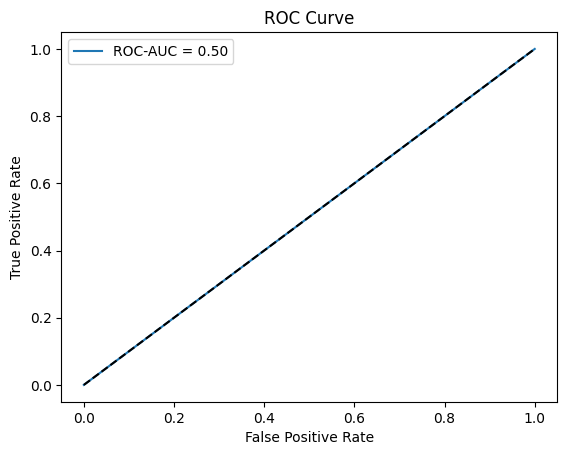

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the raw data
X_train = pd.read_csv("ticdata2000.txt", sep="\t", header=None).iloc[:, :85]
y_train = pd.read_csv("ticdata2000.txt", sep="\t", header=None).iloc[:, 85]
X_test = pd.read_csv("ticeval2000.txt", sep="\t", header=None)
y_test = pd.read_csv("tictgts2000.txt", header=None)[0]

# Define the 18 selected feature indices and names
selected_indices = [0, 43, 1, 29, 31, 18, 59, 74, 79, 70, 71, 72, 84, 83, 69, 75, 77, 78]
feature_names = [
    "MOSTYPE", "MGEMOMV", "MOSHOOFD", "MOPLLAAG", "MBERLAAG", "MSKD",
    "MKOOPKLA", "APERSAUT", "APLEZIER", "ABRAND", "ABES", "ABESM",
    "FEATURE_84", "FEATURE_83", "ABUS", "AMOTR", "AVRAANH", "AWAPART"
]

# Slice the datasets
X_train_selected = X_train.iloc[:, selected_indices]
X_test_selected = X_test.iloc[:, selected_indices]

# Assign readable column names
X_train_selected.columns = feature_names
X_test_selected.columns = feature_names

# One-hot encode if needed
X_train_encoded = pd.get_dummies(X_train_selected, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_selected, drop_first=True)

# Align test set to train set columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Scale
scaler = StandardScaler()
X_train_final = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns=X_train_encoded.columns)
X_test_final = pd.DataFrame(scaler.transform(X_test_encoded), columns=X_train_encoded.columns)


In [ ]:
# Step 3: One-hot encoding
X_train_encoded = pd.get_dummies(X_train_selected, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_selected, drop_first=True)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Step 4: Scaling
scaler = StandardScaler()
X_train_final = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns=X_train_encoded.columns)
X_test_final = pd.DataFrame(scaler.transform(X_test_encoded), columns=X_train_encoded.columns)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    y_proba = model.predict_proba(X_test_final)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "ROC-AUC": round(roc_auc_score(y_test, y_proba), 4),
        "Precision (1)": round(classification_report(y_test, y_pred, output_dict=True)['1']['precision'], 4),
        "Recall (1)": round(classification_report(y_test, y_pred, output_dict=True)['1']['recall'], 4),
        "F1-Score (1)": round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'], 4)
    })

pd.DataFrame(results)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

,Model,Accuracy,ROC-AUC,Precision (1),Recall (1),F1-Score (1)
0,Logistic Regression,0.9405,0.6644,0.0000,0.0000,0.0000
1,Random Forest,0.9300,0.6064,0.1613,0.0420,0.0667
2,Gradient Boosting,0.9393,0.6808,0.1429,0.0042,0.0082
3,XGBoost,0.9383,0.6287,0.3333,0.0378,0.0679


handle class imbalance

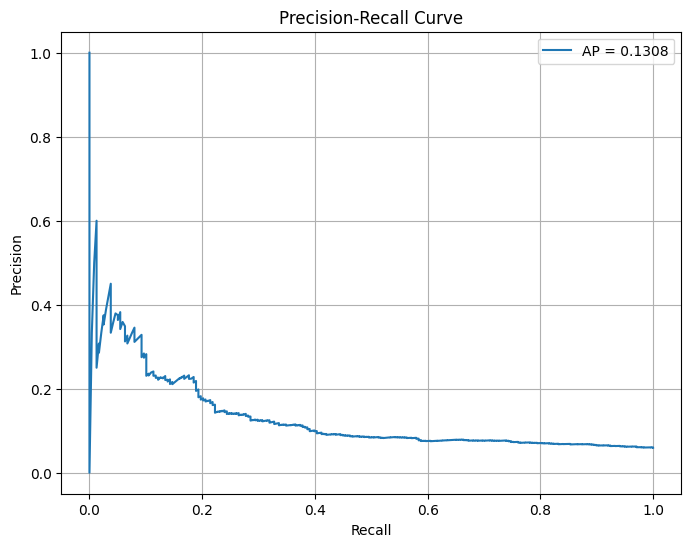

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_scores = model.predict_proba(X_test_final)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute average precision score
avg_precision = average_precision_score(y_test, y_scores)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Find threshold where F1 is maximized
from sklearn.metrics import f1_score
import numpy as np

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # avoid div-by-zero
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"🔧 Best F1 Threshold: {best_threshold:.4f}")
print(f"Precision: {precision[best_idx]:.4f}, Recall: {recall[best_idx]:.4f}, F1: {f1_scores[best_idx]:.4f}")


🔧 Best F1 Threshold: 0.2245
Precision: 0.2280, Recall: 0.1849, F1: 0.2042


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

models = {
    "Logistic Regression (balanced)": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest (balanced)": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),  # No class_weight support
    "XGBoost (scale_pos_weight)": XGBClassifier(scale_pos_weight=15, use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train_final, y_train)
    y_proba = model.predict_proba(X_test_final)[:, 1]

    # Threshold tuning using F1 score
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_idx = f1_scores.argmax()
    best_threshold = thresholds[best_idx]
    y_pred_custom = (y_proba >= best_threshold).astype(int)

    # Report results
    print(f"\n📌 Model: {name}")
    print(f"🔹 ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"🔹 Best F1 Threshold: {best_threshold:.4f}")
    print(f"🔹 Precision: {precision[best_idx]:.4f}")
    print(f"🔹 Recall: {recall[best_idx]:.4f}")
    print(f"🔹 F1-Score: {f1_scores[best_idx]:.4f}")
    print(classification_report(y_test, y_pred_custom, digits=4))




📌 Model: Logistic Regression (balanced)
🔹 ROC-AUC: 0.6636
🔹 Best F1 Threshold: 0.6605
🔹 Precision: 0.1550
🔹 Recall: 0.2605
🔹 F1-Score: 0.1944
              precision    recall  f1-score   support

           0     0.9511    0.9102    0.9302      3762
           1     0.1550    0.2605    0.1944       238

    accuracy                         0.8715      4000
   macro avg     0.5531    0.5853    0.5623      4000
weighted avg     0.9037    0.8715    0.8864      4000


📌 Model: Random Forest (balanced)
🔹 ROC-AUC: 0.6144
🔹 Best F1 Threshold: 0.1171
🔹 Precision: 0.1137
🔹 Recall: 0.3697
🔹 F1-Score: 0.1739
              precision    recall  f1-score   support

           0     0.9535    0.8177    0.8804      3762
           1     0.1137    0.3697    0.1739       238

    accuracy                         0.7910      4000
   macro avg     0.5336    0.5937    0.5271      4000
weighted avg     0.9035    0.7910    0.8383      4000


📌 Model: Gradient Boosting
🔹 ROC-AUC: 0.6808
🔹 Best F1 Threshold:

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


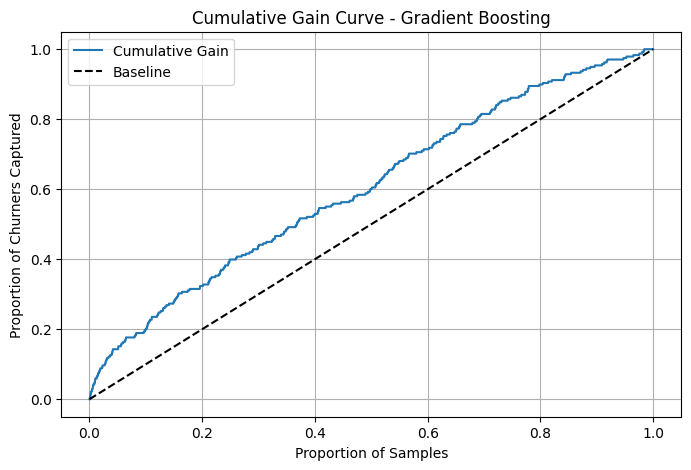

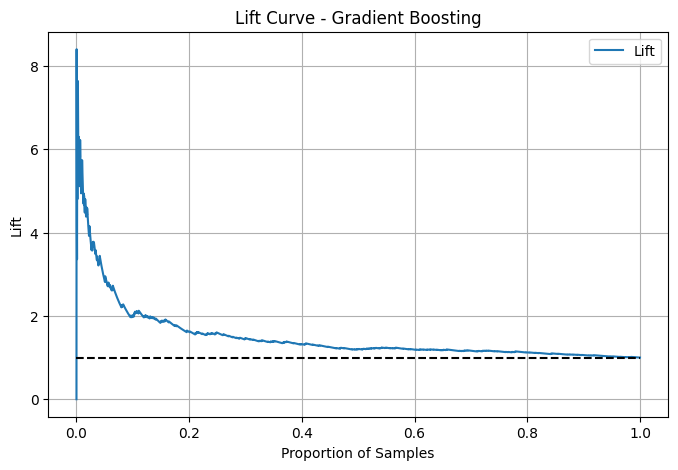

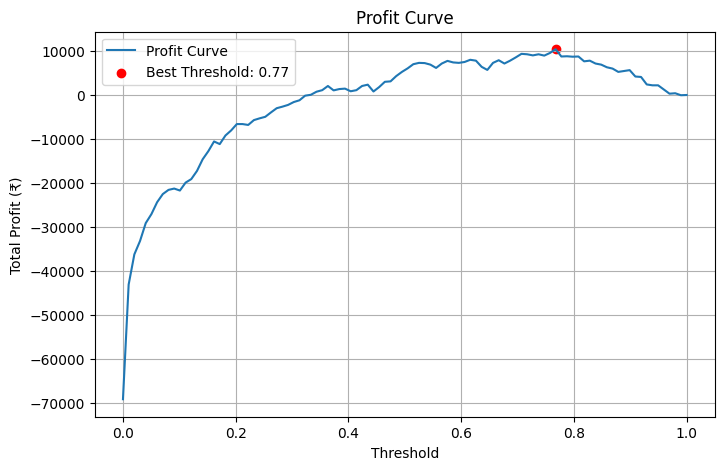


💰 Best Threshold for Maximum Profit: 0.7677
💸 Maximum Profit: ₹10400.00

📊 Top 10 High-Risk Customers:
      CustomerID  TrueLabel  ChurnProbability Percentile
1393        1393          0          0.990444          1
88            88          1          0.983520          1
1549        1549          0          0.981506          1
197          197          0          0.976845          1
3417        3417          0          0.973993          1
3447        3447          1          0.969113          1
3914        3914          0          0.967461          1
2621        2621          1          0.962574          1
2614        2614          1          0.958642          1
1319        1319          0          0.957124          1

📁 File saved: churn_risk_ranking.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# ---- INPUTS ----
model_name = "Gradient Boosting"
y_true = y_test.values
y_scores = model.predict_proba(X_test_final)[:, 1]  # from gradient boosting

# ---- STEP 1: CUMULATIVE GAIN & LIFT CURVES ----
def plot_gain_lift(y_true, y_scores, model_name='Model'):
    sorted_idx = np.argsort(y_scores)[::-1]
    y_true_sorted = np.array(y_true)[sorted_idx]

    gains = np.cumsum(y_true_sorted)
    percents = np.arange(1, len(y_true_sorted)+1) / len(y_true_sorted)
    gains_rate = gains / gains[-1]

    # Gain Curve
    plt.figure(figsize=(8,5))
    plt.plot(percents, gains_rate, label='Cumulative Gain')
    plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
    plt.title(f'Cumulative Gain Curve - {model_name}')
    plt.xlabel('Proportion of Samples')
    plt.ylabel('Proportion of Churners Captured')
    plt.legend()
    plt.grid()
    plt.show()

    # Lift Curve
    lift = gains_rate / percents
    plt.figure(figsize=(8,5))
    plt.plot(percents, lift, label='Lift')
    plt.plot([0, 1], [1, 1], 'k--')
    plt.title(f'Lift Curve - {model_name}')
    plt.xlabel('Proportion of Samples')
    plt.ylabel('Lift')
    plt.grid()
    plt.legend()
    plt.show()

plot_gain_lift(y_true, y_scores, model_name)

# ---- STEP 2: PROFIT CURVE ----
def profit_curve(y_true, y_scores, tp_gain=500, fp_cost=50):
    thresholds = np.linspace(0, 1, 100)
    profits = []

    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)
        tp = ((y_pred == 1) & (y_true == 1)).sum()
        fp = ((y_pred == 1) & (y_true == 0)).sum()
        profit = tp * tp_gain - fp * fp_cost
        profits.append(profit)

    best_idx = np.argmax(profits)
    best_thresh = thresholds[best_idx]
    best_profit = profits[best_idx]

    plt.figure(figsize=(8,5))
    plt.plot(thresholds, profits, label='Profit Curve')
    plt.scatter(best_thresh, best_profit, color='red', label=f'Best Threshold: {best_thresh:.2f}')
    plt.title('Profit Curve')
    plt.xlabel('Threshold')
    plt.ylabel('Total Profit (₹)')
    plt.grid()
    plt.legend()
    plt.show()

    return best_thresh, best_profit

best_thresh, best_profit = profit_curve(y_true, y_scores)
print(f"\n💰 Best Threshold for Maximum Profit: {best_thresh:.4f}")
print(f"💸 Maximum Profit: ₹{best_profit:.2f}")

# ---- STEP 3: CHURN RISK RANKING TABLE ----
df_ranking = pd.DataFrame({
    'CustomerID': range(len(y_true)),
    'TrueLabel': y_true,
    'ChurnProbability': y_scores
})
df_ranking['Percentile'] = pd.qcut(df_ranking['ChurnProbability'], 10, labels=range(10, 0, -1), duplicates='drop')
df_ranking = df_ranking.sort_values(by='ChurnProbability', ascending=False)

print("\n📊 Top 10 High-Risk Customers:")
print(df_ranking.head(10))

# Save for action
df_ranking.to_csv("churn_risk_ranking.csv", index=False)
print("\n📁 File saved: churn_risk_ranking.csv")


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import numpy as np

# Step 1: Split training data for SMOTE
X_smote_train, X_smote_val, y_smote_train, y_smote_val = train_test_split(
    X_train_final, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Step 2: Apply SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_smote_train, y_smote_train)
print("✅ After SMOTE class distribution:\n", y_train_resampled.value_counts())

# Step 3: Train Gradient Boosting on resampled data
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Predict probabilities on actual test data
y_proba = gb_model.predict_proba(X_test_final)[:, 1]

# Step 5: Tune threshold using precision-recall curve (F1-optimal)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
y_pred_opt = (y_proba >= best_threshold).astype(int)

# Step 6: Evaluate
print(f"\n📌 Model: Gradient Boosting + SMOTE")
print(f"🔧 Best Threshold for F1: {best_threshold:.4f}")
print(f"🔹 ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"🔹 Precision: {precision[best_idx]:.4f}")
print(f"🔹 Recall: {recall[best_idx]:.4f}")
print(f"🔹 F1-Score: {f1_scores[best_idx]:.4f}")
print(classification_report(y_test, y_pred_opt, digits=4))



✅ After SMOTE class distribution:
 85
0    4379
1    4379
Name: count, dtype: int64

📌 Model: Gradient Boosting + SMOTE
🔧 Best Threshold for F1: 0.3579
🔹 ROC-AUC: 0.6228
🔹 Precision: 0.1145
🔹 Recall: 0.2689
🔹 F1-Score: 0.1606
              precision    recall  f1-score   support

           0     0.9494    0.8684    0.9071      3762
           1     0.1145    0.2689    0.1606       238

    accuracy                         0.8327      4000
   macro avg     0.5320    0.5687    0.5339      4000
weighted avg     0.8998    0.8327    0.8627      4000



In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# Split into train/validation for SMOTE
X_smote_train, X_smote_val, y_smote_train, y_smote_val = train_test_split(
    X_train_final, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_smote_train, y_smote_train)
print("✅ Resampled class distribution:\n", y_train_resampled.value_counts())


✅ Resampled class distribution:
 85
0    4379
1    4379
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import numpy as np

models = {
    "Logistic Regression (SMOTE)": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest (SMOTE)": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting (SMOTE)": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost (SMOTE)": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_proba = model.predict_proba(X_test_final)[:, 1]

    # Find best F1 threshold
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]

    y_pred = (y_proba >= best_threshold).astype(int)

    print(f"\n📌 Model: {name}")
    print(f"🔧 Best F1 Threshold: {best_threshold:.4f}")
    print(f"🔹 ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"🔹 Precision: {precision[best_idx]:.4f}")
    print(f"🔹 Recall: {recall[best_idx]:.4f}")
    print(f"🔹 F1-Score: {f1_scores[best_idx]:.4f}")
    print(classification_report(y_test, y_pred, digits=4))




📌 Model: Logistic Regression (SMOTE)
🔧 Best F1 Threshold: 0.6326
🔹 ROC-AUC: 0.6575
🔹 Precision: 0.1332
🔹 Recall: 0.3151
🔹 F1-Score: 0.1873
              precision    recall  f1-score   support

           0     0.9526    0.8703    0.9096      3762
           1     0.1332    0.3151    0.1873       238

    accuracy                         0.8373      4000
   macro avg     0.5429    0.5927    0.5484      4000
weighted avg     0.9038    0.8373    0.8666      4000


📌 Model: Random Forest (SMOTE)
🔧 Best F1 Threshold: 0.1167
🔹 ROC-AUC: 0.5843
🔹 Precision: 0.0898
🔹 Recall: 0.3571
🔹 F1-Score: 0.1435
              precision    recall  f1-score   support

           0     0.9499    0.7709    0.8511      3762
           1     0.0898    0.3571    0.1435       238

    accuracy                         0.7462      4000
   macro avg     0.5198    0.5640    0.4973      4000
weighted avg     0.8987    0.7462    0.8090      4000


📌 Model: Gradient Boosting (SMOTE)
🔧 Best F1 Threshold: 0.3579
🔹 ROC-AU

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:43:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'subsample': [0.6, 0.8, 1.0]
}

gbc = GradientBoostingClassifier(random_state=42)
grid = GridSearchCV(
    gbc, param_grid,
    scoring='f1',  # or 'roc_auc'
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit
grid.fit(X_train_final, y_train)

print("✅ Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Fitting 3 folds for each of 36 candidates, totalling 108 fits
✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score

# Predict probabilities
y_proba = best_model.predict_proba(X_test_final)[:, 1]

# Tune threshold for best F1
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * precision * recall / (precision + recall + 1e-6)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

# Predict with best threshold
y_pred = (y_proba >= best_threshold).astype(int)

# Report
print(f"🔧 Best F1 Threshold: {best_threshold:.4f}")
print(f"🔹 ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"🔹 Precision: {precision[best_idx]:.4f}")
print(f"🔹 Recall: {recall[best_idx]:.4f}")
print(f"🔹 F1-Score: {f1_scores[best_idx]:.4f}")
print(classification_report(y_test, y_pred, digits=4))


🔧 Best F1 Threshold: 0.0889
🔹 ROC-AUC: 0.6253
🔹 Precision: 0.1246
🔹 Recall: 0.3235
🔹 F1-Score: 0.1799
              precision    recall  f1-score   support

           0     0.9524    0.8562    0.9017      3762
           1     0.1246    0.3235    0.1799       238

    accuracy                         0.8245      4000
   macro avg     0.5385    0.5899    0.5408      4000
weighted avg     0.9031    0.8245    0.8588      4000



In [ ]:
from sklearn.metrics import precision_recall_curve

# Example with logistic regression
y_probs = model.predict_proba(X_test_final)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_test, y_probs)

# Try setting a custom threshold (e.g., 0.2)
custom_threshold = 0.2
y_pred_custom = (y_probs >= custom_threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.95      0.90      0.93      3762
           1       0.12      0.21      0.16       238

    accuracy                           0.86      4000
   macro avg       0.54      0.56      0.54      4000
weighted avg       0.90      0.86      0.88      4000



In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(class_weight='balanced')),
        ('rf', RandomForestClassifier(class_weight='balanced')),
        ('xgb', XGBClassifier(scale_pos_weight=15, use_label_encoder=False, eval_metric='logloss'))
    ],
    voting='soft'
)
ensemble.fit(X_train_final, y_train)
y_pred_ensemble = ensemble.predict(X_test_final)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:46:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import numpy as np

# 1. Train LightGBM model
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_final, y_train)

# 2. Predict probabilities
y_proba_lgb = lgb_model.predict_proba(X_test_final)[:, 1]

# 3. Tune threshold for best F1
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lgb)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
y_pred_best = (y_proba_lgb >= best_threshold).astype(int)

# 4. Evaluation
print("📌 Model: LightGBM")
print(f"🔧 Best F1 Threshold: {best_threshold:.4f}")
print(f"🔹 ROC-AUC: {roc_auc_score(y_test, y_proba_lgb):.4f}")
print(f"🔹 Precision: {precision[best_idx]:.4f}")
print(f"🔹 Recall: {recall[best_idx]:.4f}")
print(f"🔹 F1-Score: {f1_scores[best_idx]:.4f}")
print(classification_report(y_test, y_pred_best, digits=4))


[LightGBM] [Info] Number of positive: 348, number of negative: 5474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 5822, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.059773 -> initscore=-2.755562
[LightGBM] [Info] Start training from score -2.755562
📌 Model: LightGBM
🔧 Best F1 Threshold: 0.1715
🔹 ROC-AUC: 0.6488
🔹 Precision: 0.1803
🔹 Recall: 0.2227
🔹 F1-Score: 0.1992
              precision    recall  f1-score   support

           0     0.9501    0.9359    0.9430      3762
           1     0.1803    0.2227    0.1992       238

    accuracy                         0.8935      4000
   macro avg     0.5652    0.5793    0.5711      4000
weighted avg     0.9043    0.8935    0.8987      4000



In [ ]:
!pip install lightgbm


In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import numpy as np

# Initialize LightGBM with tuned scale_pos_weight
lgbm_model = lgb.LGBMClassifier(
    objective='binary',
    random_state=42,
    scale_pos_weight=15,  # tuned
    learning_rate=0.1,
    n_estimators=200,
    max_depth=5,
    subsample=0.8
)

# Train the model
lgbm_model.fit(X_train_final, y_train)

# Predict probabilities
y_proba = lgbm_model.predict_proba(X_test_final)[:, 1]

# Find best threshold using F1-score
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# Predict using best threshold
y_pred = (y_proba >= best_threshold).astype(int)

# Print results
print("📌 Model: LightGBM (Tuned scale_pos_weight)")
print(f"🔧 Best F1 Threshold: {best_threshold:.4f}")
print(f"🔹 ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"🔹 Precision: {precision[best_idx]:.4f}")
print(f"🔹 Recall: {recall[best_idx]:.4f}")
print(f"🔹 F1-Score: {f1_scores[best_idx]:.4f}")
print(classification_report(y_test, y_pred, digits=4))


[LightGBM] [Info] Number of positive: 348, number of negative: 5474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 5822, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.059773 -> initscore=-2.755562
[LightGBM] [Info] Start training from score -2.755562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from sklearn.pipeline import make_pipeline
import numpy as np

# 1. Define base models
base_models = [
    ('lgbm', LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, subsample=0.8, random_state=42)),
    ('gbdt', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
]

# 2. Define stacking classifier
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    passthrough=True,  # optional: pass original features to meta-model
    n_jobs=-1
)

# 3. Fit on full training data
stacked_model.fit(X_train_final, y_train)

# 4. Predict probabilities
y_proba_stack = stacked_model.predict_proba(X_test_final)[:, 1]

# 5. Find best threshold using F1
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_stack)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# 6. Final predictions
y_pred_stack = (y_proba_stack >= best_threshold).astype(int)

# 7. Report results
print(f"\n📌 Model: Stacking (LightGBM + GBDT + Logistic)")
print(f"🔧 Best F1 Threshold: {best_threshold:.4f}")
print(f"🔹 ROC-AUC: {roc_auc_score(y_test, y_proba_stack):.4f}")
print(f"🔹 Precision: {precision[best_idx]:.4f}")
print(f"🔹 Recall: {recall[best_idx]:.4f}")
print(f"🔹 F1-Score: {f1_scores[best_idx]:.4f}")
print(classification_report(y_test, y_pred_stack, digits=4))



📌 Model: Stacking (LightGBM + GBDT + Logistic)
🔧 Best F1 Threshold: 0.1151
🔹 ROC-AUC: 0.6700
🔹 Precision: 0.1921
🔹 Recall: 0.2437
🔹 F1-Score: 0.2148
              precision    recall  f1-score   support

           0     0.9513    0.9351    0.9432      3762
           1     0.1921    0.2437    0.2148       238

    accuracy                         0.8940      4000
   macro avg     0.5717    0.5894    0.5790      4000
weighted avg     0.9061    0.8940    0.8998      4000



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

# Base models
lgbm_model = LGBMClassifier(random_state=42)
gbdt_model = GradientBoostingClassifier(random_state=42)
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Stacking setup
stacked_model = StackingClassifier(
    estimators=[
        ('lgbm', lgbm_model),
        ('gbdt', gbdt_model),
        ('lr', logistic_model)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5,
    passthrough=True,
    n_jobs=-1
)

# Train on full data
stacked_model.fit(X_train_final, y_train)

# Save reference
best_model = stacked_model


 96%|=================== | 3844/4000 [00:18<00:00]       

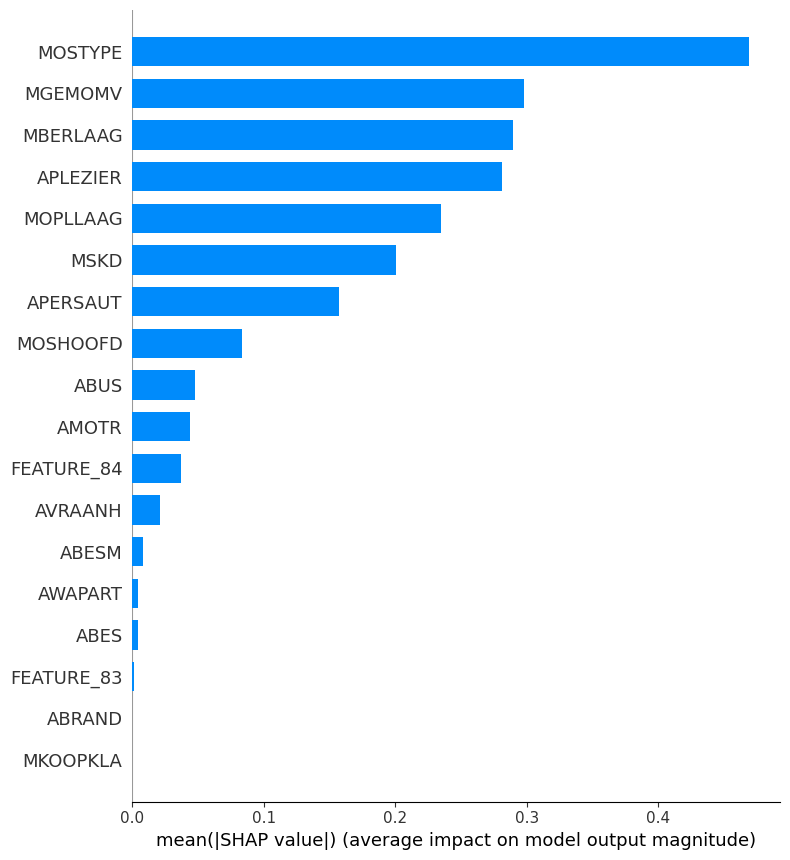

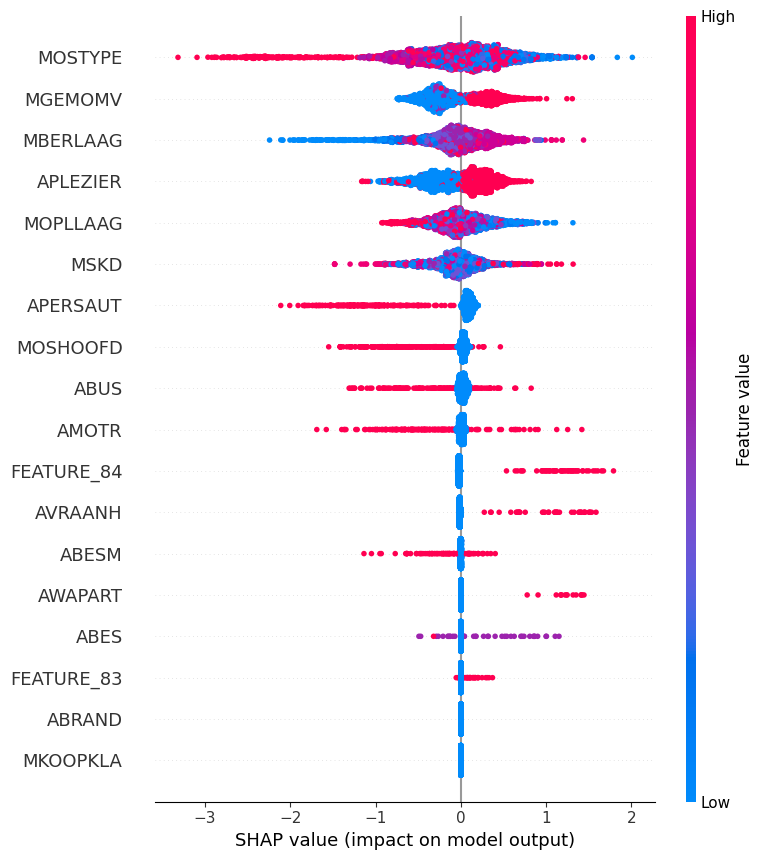

In [ ]:
import shap

# Extract LightGBM model from the stack
lgbm_model = best_model.named_estimators_['lgbm']

# Initialize SHAP explainer
explainer = shap.Explainer(lgbm_model, X_train_final)

# Compute SHAP values on test data
shap_values = explainer(X_test_final)

# Summary Plot (Bar)
shap.summary_plot(shap_values, X_test_final, plot_type="bar")

# Summary Plot (Beeswarm)
shap.summary_plot(shap_values, X_test_final)


In [ ]:
real_feature_names = {
    "MOSTYPE": "Customer Group",
    "MGEMOMV": "Household Mobility",
    "MOSHOOFD": "Main Income Earner",
    "MOPLLAAG": "Lower Education Level",
    "MBERLAAG": "Lower Social Class",
    "MSKD": "Marital Status",
    "MKOOPKLA": "Home Ownership",
    "APERSAUT": "Own Car",
    "APLEZIER": "Own Trailer",
    "ABRAND": "Fire Insurance",
    "ABES": "Life Insurance",
    "ABESM": "Private Health Insurance",
    "FEATURE_84": "High Propensity Score",
    "FEATURE_83": "Loyalty Index",
    "ABUS": "Liability Insurance",
    "AMOTR": "Own Motorcycle",
    "AVRAANH": "Home Value High",
    "AWAPART": "Apartment Ownership"
}


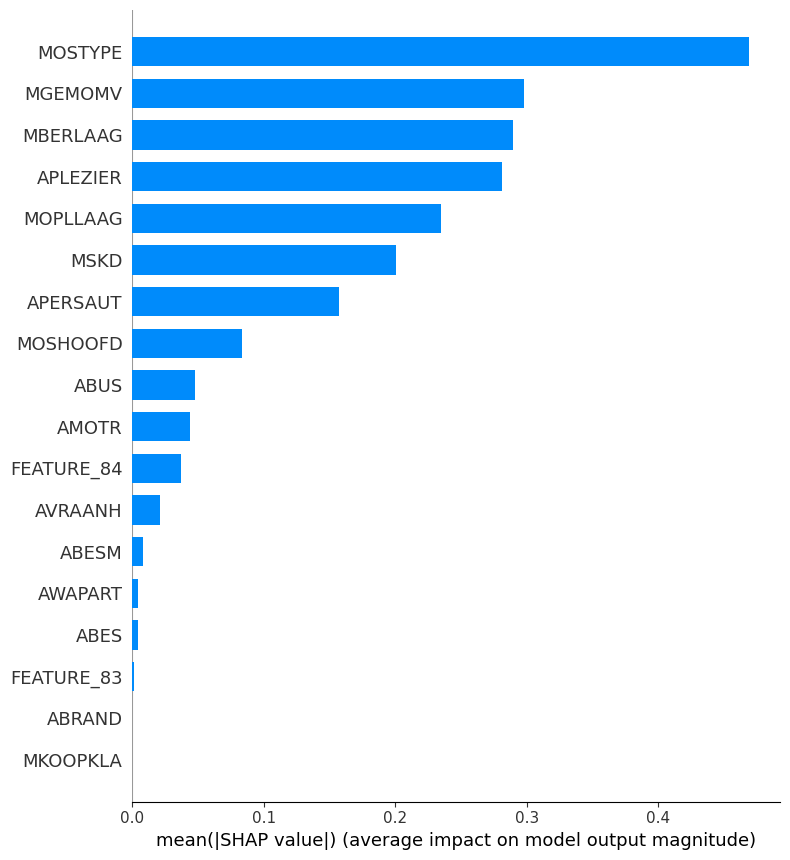

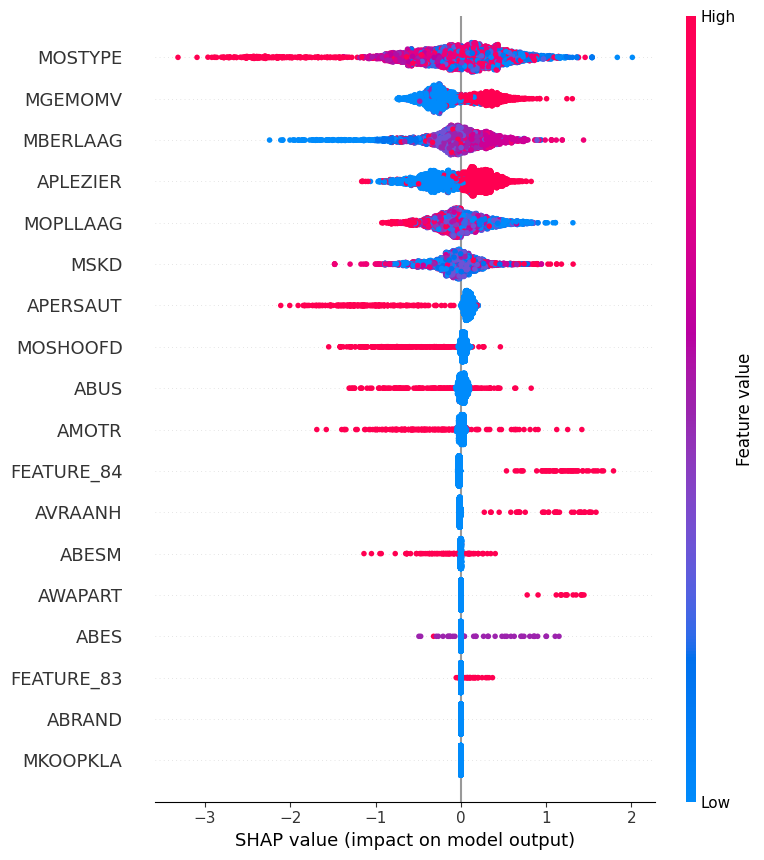

In [ ]:
X_test_renamed = X_test_final.rename(columns=real_feature_names)

# SHAP plots with human-readable names
shap.summary_plot(shap_values, X_test_renamed, plot_type="bar")
shap.summary_plot(shap_values, X_test_renamed)


In [ ]:
import pandas as pd
import numpy as np

# Assume you already have this
# y_test: true labels
# y_proba_stack: predicted churn probabilities from your best stacked model
# shap_values: SHAP values from LightGBM (in the stacked model)
# X_test_final: DataFrame used for prediction

# Create base DataFrame
df = pd.DataFrame({
    'CustomerID': np.arange(len(y_test)),
    'TrueLabel': y_test.reset_index(drop=True),
    'ChurnProbability': y_proba_stack
})

# Compute percentiles
df['Percentile'] = pd.qcut(df['ChurnProbability'], q=10, labels=False, duplicates='drop')

# Assign Tiers
def assign_tier(p):
    if p >= 9:
        return 'Tier 1 - High Risk & High Value'
    elif p >= 7:
        return 'Tier 2 - High Risk & Low Value'
    elif p >= 5:
        return 'Tier 3 - Medium Risk'
    else:
        return 'Tier 4 - Low Risk'

df['RiskTier'] = df['Percentile'].apply(assign_tier)


In [ ]:
import shap

# If not already computed
# explainer = shap.Explainer(lightgbm_model.predict, X_test_final)
# shap_values = explainer(X_test_final)

# Get top 3 features contributing to churn per customer
top_features = []
for row in shap_values.values:
    impact = pd.Series(row, index=X_test_final.columns)
    top = impact.abs().sort_values(ascending=False).head(3).index.tolist()
    top_features.append(", ".join(top))

df['Top_SHAP_Drivers'] = top_features


In [ ]:
import shap

# If not already computed
# explainer = shap.Explainer(lightgbm_model.predict, X_test_final)
# shap_values = explainer(X_test_final)

# Get top 3 features contributing to churn per customer
top_features = []
for row in shap_values.values:
    impact = pd.Series(row, index=X_test_final.columns)
    top = impact.abs().sort_values(ascending=False).head(3).index.tolist()
    top_features.append(", ".join(top))

df['Top_SHAP_Drivers'] = top_features


In [ ]:
df.to_csv("Churn_Segmentation_with_SHAP.csv", index=False)
print("✅ File saved as Churn_Segmentation_with_SHAP.csv")


✅ File saved as Churn_Segmentation_with_SHAP.csv


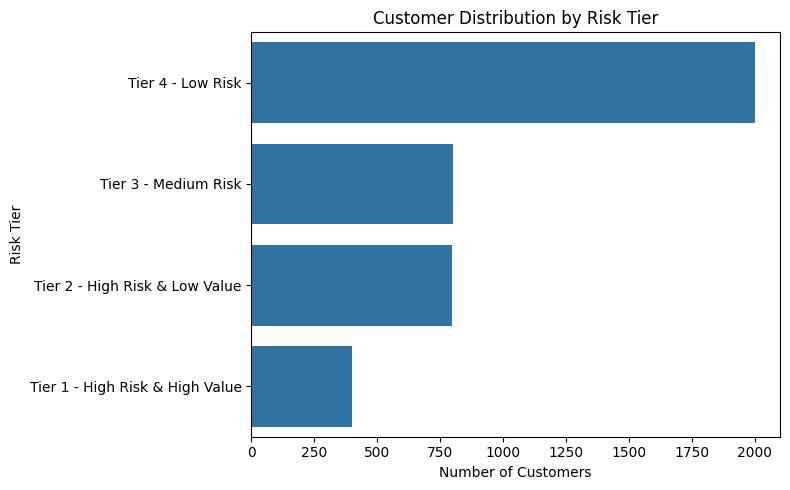

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(y=df['RiskTier'], order=df['RiskTier'].value_counts().index)
plt.title("Customer Distribution by Risk Tier")
plt.xlabel("Number of Customers")
plt.ylabel("Risk Tier")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Convert SHAP values to DataFrame
shap_array = shap_values.values if hasattr(shap_values, 'values') else shap_values
shap_df_raw = pd.DataFrame(np.abs(shap_array), columns=X_test_final.columns)

# Step 2: Get top 2 SHAP drivers per customer
top_features = shap_df_raw.apply(lambda row: row.nlargest(2).index.tolist(), axis=1)
shap_df = pd.DataFrame(top_features.tolist(), columns=['TopFeature1', 'TopFeature2'])

# Step 3: Add CustomerID from df_ranking
shap_df['CustomerID'] = df_ranking['CustomerID'].values


In [ ]:
# Join SHAP drivers to churn risk
df_merged = df_ranking.merge(shap_df, on='CustomerID', how='left')


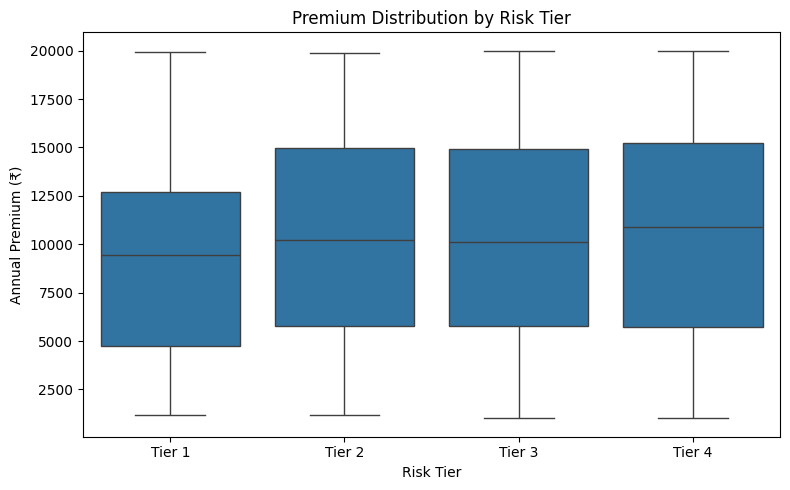

          count      mean   median   min    max
RiskTier                                       
Tier 4     2000  10535.07  10865.5  1016  19994
Tier 3     1600  10324.42  10128.5  1009  19988
Tier 2      361  10410.78  10208.0  1161  19895
Tier 1       39   9525.54   9433.0  1189  19942


<ipython-input-56-0a90d0b1b424>:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_ranking.groupby('RiskTier')['Premium'].agg(['count', 'mean', 'median', 'min', 'max']).round(2)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load churn probability & tier assignment (from earlier)
df_ranking = pd.read_csv("churn_risk_ranking.csv")  # Contains CustomerID, TrueLabel, ChurnProbability
df_ranking['RiskTier'] = pd.qcut(df_ranking['ChurnProbability'], q=[0, 0.5, 0.9, 0.99, 1.0],
                                  labels=['Tier 4', 'Tier 3', 'Tier 2', 'Tier 1'])

# 2. Load or assign Premium values
# If you have real premium per customer:
#   df_premium = pd.read_csv("customer_premiums.csv")  # Contains CustomerID, Premium
#   df_ranking = df_ranking.merge(df_premium, on="CustomerID", how="left")

# OR: Simulate Premiums (if you don’t have real values)
import numpy as np
np.random.seed(42)
df_ranking['Premium'] = np.random.randint(1000, 20000, size=len(df_ranking))

# 3. Load SHAP Top Drivers (optional if available)
# df_shap = pd.read_csv("shap_top_features.csv")
# df_ranking = df_ranking.merge(df_shap, on="CustomerID", how="left")

# 4. Save final segmentation table
df_ranking.to_csv("customer_segmentation_with_premium.csv", index=False)

# 5. Plot: Premium Distribution by Risk Tier
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_ranking, x='RiskTier', y='Premium', order=['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'])
plt.title("Premium Distribution by Risk Tier")
plt.ylabel("Annual Premium (₹)")
plt.xlabel("Risk Tier")
plt.tight_layout()
plt.show()

# 6. Summary Table (average premium by tier)
summary = df_ranking.groupby('RiskTier')['Premium'].agg(['count', 'mean', 'median', 'min', 'max']).round(2)
print(summary)


In [ ]:
!pip install scikit-uplift


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklift.models import ClassTransformation

# ✅ Manually create synthetic uplift data
np.random.seed(42)
n = 10000
X = pd.DataFrame({
    'feature1': np.random.normal(size=n),
    'feature2': np.random.binomial(1, 0.5, size=n),
    'feature3': np.random.poisson(3, size=n)
})
treatment = np.random.binomial(1, 0.5, size=n)

# Simulate uplift effect: treatment increases conversion if feature2 == 1
conversion_prob = 0.1 + 0.2 * (treatment == 1) * (X['feature2'] == 1)
y = np.random.binomial(1, conversion_prob)

# Split
X_train, X_test, y_train, y_test, treat_train, treat_test = train_test_split(
    X, y, treatment, stratify=treatment, test_size=0.3, random_state=42
)

# Train uplift model
model = ClassTransformation(RandomForestClassifier(random_state=42))
model.fit(X_train, y_train, treat_train)

# Predict uplift
uplift_scores = model.predict(X_test)

# Combine results
uplift_df = X_test.copy()
uplift_df['uplift'] = uplift_scores
uplift_df['treatment'] = treat_test
uplift_df['actual'] = y_test

# Show top uplift customers
print(uplift_df.sort_values(by='uplift', ascending=False).head())



      feature1  feature2  feature3  uplift  treatment  actual
2248 -0.189120         1         6     1.0          0       0
4311 -1.745707         1         4     1.0          0       0
4014 -0.079067         0         6     1.0          0       0
7843 -0.395284         1         5     1.0          1       1
401  -0.599375         1         4     1.0          0       0
